### Librerias 

In [30]:
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime

### Dataframe

In [31]:
data = pd.read_csv('Conteo_barandal.csv', on_bad_lines='skip')
data

,Fecha,Barandal,No Barandal
0,2022-12-29 14:40:07,0,0
1,2022-12-29 14:48:21,0,1
2,2022-12-29 14:48:33,0,2
3,2022-12-29 14:48:59,0,3
4,2022-12-29 14:51:45,1,3
...,...,...,...
11235,2023-01-11 15:46:37.435196,4781,6454
11236,2023-01-11 15:47:37.560197,4781,6455
11237,2023-01-11 15:47:59.619211,4782,6455
11238,2023-01-11 15:48:03.818975,4783,6455


### Conteo de personas que agarraron el barandal por dia

In [32]:
data['Fecha'] = pd.to_datetime(data['Fecha'], dayfirst=False)
barandal_dia = data.sort_values(['Fecha', 'Barandal']).groupby(data['Fecha'].dt.date)['Barandal'].agg(['first', 'last']).reset_index()
barandal_dia['Barandal'] = abs(barandal_dia['first'] - barandal_dia['last'])

### Conteo de personas que no agarraron el barandal por dia

In [33]:
no_barandal_dia = data.sort_values(['Fecha', 'No Barandal']).groupby(data['Fecha'].dt.date)['No Barandal'].agg(['first', 'last']).reset_index()
no_barandal_dia['No Barandal'] = abs(no_barandal_dia['first'] - no_barandal_dia['last'])

### Hacer df con ambos conteos

In [34]:
df = barandal_dia[['Fecha', 'Barandal']].copy()
df['No Barandal'] = no_barandal_dia['No Barandal'].values
df

,Fecha,Barandal,No Barandal
0,2022-12-29,72,125
1,2022-12-30,48,41
2,2023-01-02,316,452
3,2023-01-03,525,760
4,2023-01-04,524,761
5,2023-01-05,596,823
6,2023-01-06,223,347
7,2023-01-08,3,25
8,2023-01-09,685,937
9,2023-01-10,1268,1537


### Hacer la grafica

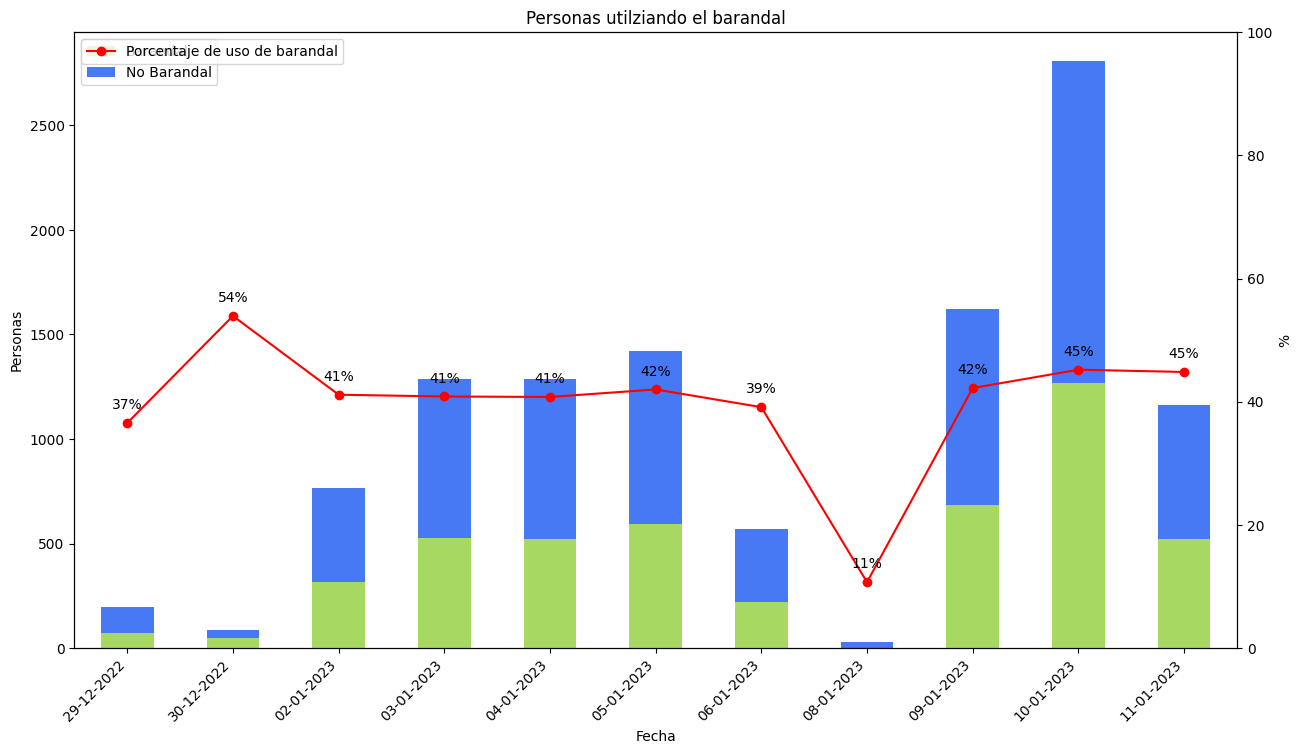

In [79]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure

# Create a sample DataFrame
df['Fecha'] = pd.to_datetime(df['Fecha'])
df.sort_values('Fecha',inplace=True)
df['Barandal_perc'] = df['Barandal']/(df['Barandal'] + df['No Barandal'])*100


# Create the stacked bar chart
ax = df.plot(kind='bar', x='Fecha', y=['Barandal','No Barandal'], stacked=True, color=('#A7D861','#4779F5'),figsize=(15, 8))

# Format the x-tick labels
plt.xticks( df.index, df['Fecha'].dt.strftime('%d-%m-%Y'), rotation=45, ha='right')

#Add Right Y-axis
ax2 = ax.twinx()

# plot the line
ax2.plot(df.index, df['Barandal_perc'], '-o', color='r', label='Porcentaje de uso de barandal')

for i, value in enumerate(df['Barandal_perc']):
    ax2.annotate(str(f'{value:.0f}') + "%", (df.index[i], value), textcoords="offset points", xytext=(0,10), ha='center')

# set y limit and label
ax2.set_ylim(0,100)
ax2.set_ylabel('%')

# Add labels and title
ax.set_xlabel('Fecha')
ax.set_ylabel('Personas')
ax.set_title('Personas utilziando el barandal')

# show the legend
ax2.legend(loc='upper left')


# Show the plot
plt.show()

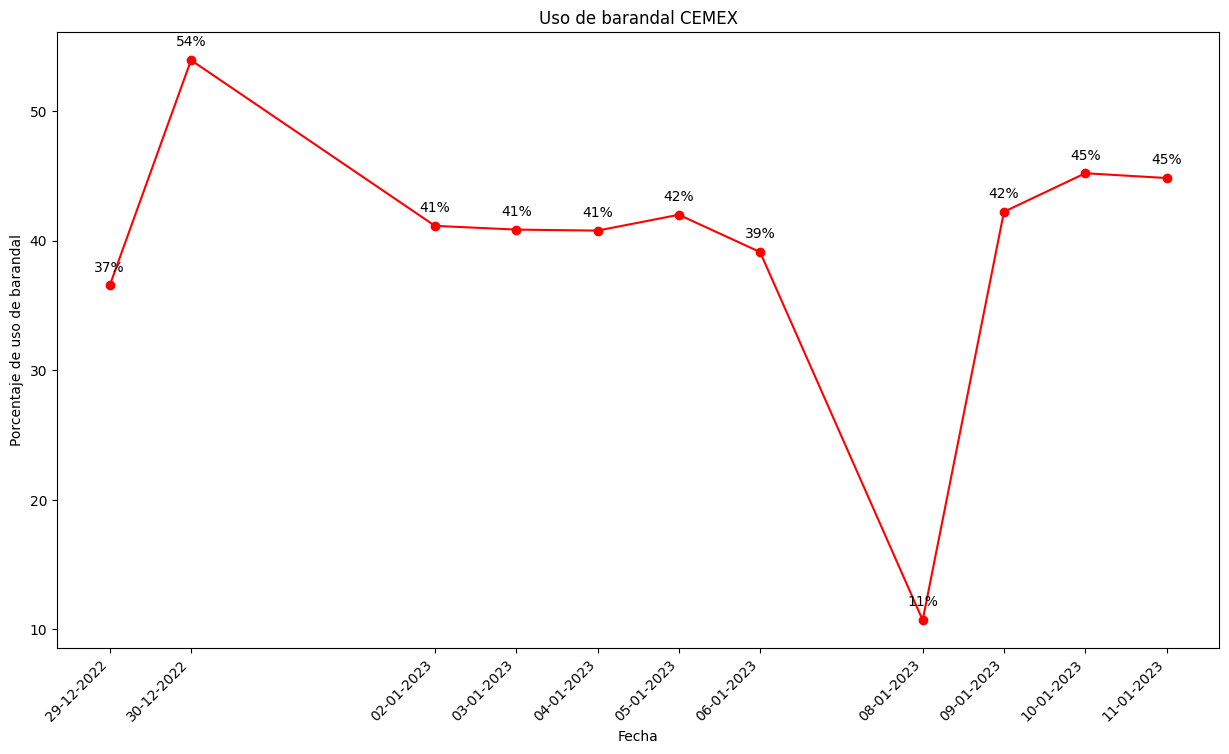

In [80]:
# Create a figure with a larger size
plt.figure(figsize=(15, 8))
# Plot the line graph
plt.plot(df['Fecha'], df['Barandal_perc'], '-o',color='red')

# Add labels and title
plt.xlabel('Fecha')
plt.ylabel('Porcentaje de uso de barandal')
plt.title('Uso de barandal CEMEX')


# Format the x-tick labels
plt.xticks(df['Fecha'], df['Fecha'].dt.strftime('%d-%m-%Y'))

# Iterate over each point and add the value
for x, y in zip(df['Fecha'], df['Barandal_perc']):
    plt.annotate(f'{y:.0f}%', (x, y), textcoords="offset points", xytext=(0,10), ha='center')

# Rotate and align date labels
plt.xticks(rotation=45, ha='right')

# Show the plot
plt.show()